<a href="https://colab.research.google.com/drive/1Xm6l4Drtfj3Dxy7T0XsV655javYVAy4S" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
%matplotlib inline
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage
from google.colab.patches import cv2_imshow

In [3]:
%cd '/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN'

img_dir = '/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN/Mask_plot/msk_CNN'
img_dir

if os.path.exists(img_dir):
      img = cv2.imread(img_dir)
else:
      print("Path does not exist:", img_dir)

prefixes = ["2201", "2202"]

img_list = sorted(os.listdir(img_dir))
img_list = [v for v in img_list if v.startswith(tuple(prefixes)) and v.endswith('_7m_msk.png')]
print(img_list)
print(len(img_list))


stand_list = []
for img in img_list:

  image = cv2.imread(os.path.join(img_dir, img)) 
  
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (5, 5), 0)

  # Compute Euclidean distance from every binary pixel
  # to the nearest zero pixel then find peaks
  distance_map = ndimage.distance_transform_edt(blur)
  local_max = peak_local_max(distance_map, indices=False, min_distance=40, labels=blur)

  # Perform connected component analysis then apply Watershed
  markers = ndimage.label(local_max, structure=np.ones((3, 3)))[0]
  labels = watershed(-distance_map, markers, mask=blur)
  cnt = len(np.unique(labels)) -1

  stand_list.append([img.split('.')[0], cnt]) ## saving stand count number
  print("Counting: bean plant per plot : ", cnt)

stand = np.array(stand_list)
np.savetxt('./stand_7m_M3.csv', stand, delimiter= ',', fmt="%s")

/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN
['2201_1001_7m_msk.png', '2201_1002_7m_msk.png', '2201_1003_7m_msk.png', '2201_1004_7m_msk.png', '2201_1005_7m_msk.png', '2201_1006_7m_msk.png', '2201_1007_7m_msk.png', '2201_1008_7m_msk.png', '2201_1009_7m_msk.png', '2201_1010_7m_msk.png', '2201_1011_7m_msk.png', '2201_1012_7m_msk.png', '2201_1013_7m_msk.png', '2201_1014_7m_msk.png', '2201_1015_7m_msk.png', '2201_1016_7m_msk.png', '2201_1017_7m_msk.png', '2201_1018_7m_msk.png', '2201_1019_7m_msk.png', '2201_1020_7m_msk.png', '2201_1021_7m_msk.png', '2201_1022_7m_msk.png', '2201_1023_7m_msk.png', '2201_1024_7m_msk.png', '2201_1025_7m_msk.png', '2201_1026_7m_msk.png', '2201_1027_7m_msk.png', '2201_1028_7m_msk.png', '2201_1029_7m_msk.png', '2201_1030_7m_msk.png', '2201_1031_7m_msk.png', '2201_1032_7m_msk.png', '2201_1033_7m_msk.png', '2201_1034_7m_msk.png', '2201_1035_7m_msk.png', '2201_1036_7m_msk.png', '2201_2001_7m_msk.png', '2201_2002_7m_msk.png

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.


Count bean plant per plot :  135
Count bean plant per plot :  163
Count bean plant per plot :  139
Count bean plant per plot :  150
Count bean plant per plot :  119
Count bean plant per plot :  119
Count bean plant per plot :  128
Count bean plant per plot :  117
Count bean plant per plot :  133
Count bean plant per plot :  143
Count bean plant per plot :  134
Count bean plant per plot :  134
Count bean plant per plot :  132
Count bean plant per plot :  152
Count bean plant per plot :  121
Count bean plant per plot :  138
Count bean plant per plot :  138
Count bean plant per plot :  146
Count bean plant per plot :  116
Count bean plant per plot :  109
Count bean plant per plot :  123
Count bean plant per plot :  138
Count bean plant per plot :  132
Count bean plant per plot :  160
Count bean plant per plot :  159
Count bean plant per plot :  131
Count bean plant per plot :  113
Count bean plant per plot :  117
Count bean plant per plot :  150
Count bean plant per plot :  121
Count bean

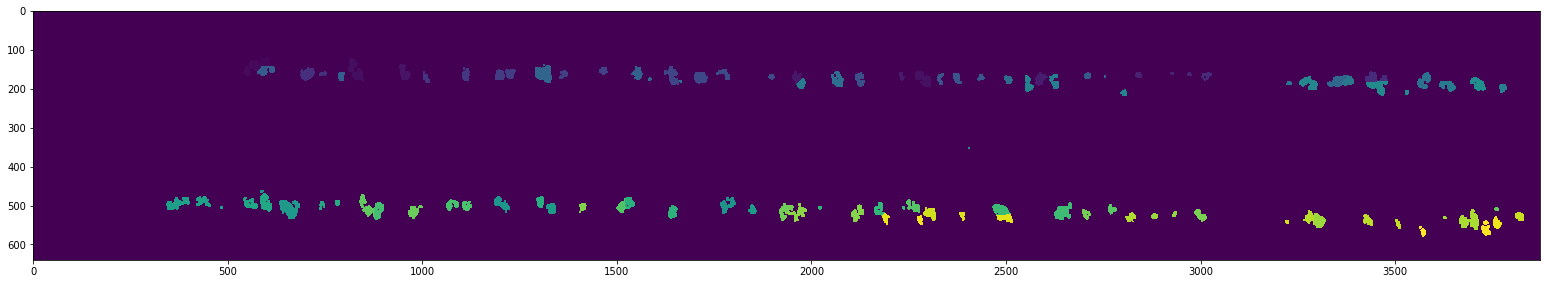

In [7]:
plt.figure(figsize = (27,10))
plt.imshow(labels, interpolation='nearest')